## NLP Sentiment Analysis

* Sentiment analysis in Natural Language Processing (NLP) is the process of determining the emotional tone of a piece of text. It classifies text as positive, negative, or neutral, helping to gauge opinions, emotions, or attitudes.

How It Works:
1. Text Preprocessing – Tokenization, stopword removal, and stemming/lemmatization to clean up the text.
2. Lexicon-Based Approach – Uses predefined word dictionaries with sentiment scores (like VADER).
3. Machine Learning Models – Trains classifiers (e.g., logistic regression, deep learning) to detect sentiment patterns from labeled datasets.
4. Contextual Analysis – Advanced models analyze tone, negations, sarcasm, and intensifiers for deeper sentiment insights.

### NLTK's VADER Sentiment Analysis
* VADER (Valence Aware Dictionary and sEntiment Reasoner) is a specialized sentiment analysis tool designed to evaluate text sentiment, especially in social media, reviews, and short text formats. It uses a pre-built lexicon of words, phrases, and emoticons, assigning sentiment scores to each based on their positive, neutral, or negative tone.
Unlike other sentiment analysis methods, VADER is fine-tuned for context-aware sentiment, handling things like capitalization, intensifiers ("very good" vs. "good"), and negations ("not bad" vs. "bad").

### SentimentIntensityAnalyzer
* SentimentIntensityAnalyzer is the class in NLTK's VADER module that performs sentiment analysis. When you pass text to it, it returns a dictionary of sentiment scores.


#### NLTK Components

Here's a breakdown of each of these NLTK components and how they fit together in natural language processing (NLP):
* nltk.tokenize.word_tokenize: Used to split a text into individual words (tokens). This is a fundamental step in NLP since most processing tasks require working with individual words.
*  nltk.corpus.stopwords: Provides a list of common words (e.g., "the," "and," "is") that are often removed from text because they don’t carry significant meaning for analysis.
* nltk.stem.PorterStemmer: A stemming algorithm that reduces words to their root form (e.g., "running" → "run"). It’s useful for simplifying text and reducing variability.
* nltk.stem.WordNetLemmatizer: Similar to stemming but more sophisticated—it finds the base word (lemma) based on meaning and linguistic rules (e.g., "better" → "good").
* nltk.FreqDist: Helps analyze word frequency in a text. It’s useful for identifying the most common words or patterns.

* How They're Used Together:
These components often work in sequence for NLP preprocessing:
	1. Tokenization (word_tokenize) to break down text.
	2. Stopword removal (stopwords) to filter irrelevant words.
	3. Lemmatization (WordNetLemmatizer) or stemming (PorterStemmer) to normalize words.
	4. Frequency analysis (FreqDist) to understand word distribution.

### Example Output:
* {'neg': 0.0, 'neu': 0.254, 'pos': 0.746, 'compound': 0.8516}
* What These Scores Mean:
    * neg (Negative Score) – Fraction of words carrying negative sentiment.
    * neu (Neutral Score) – Fraction of neutral words.
    * pos (Positive Score) – Fraction of positive words.
    * compound (Overall Score) – A single aggregated sentiment score ranging from -1 (very negative) to +1 (very positive).
* Interpreting Compound Scores:
    *  ) > 0.05 Positive sentiment
    * < -0.05 → Negative sentiment
    * -0.05 to 0.05 → Neutral sentiment


In [2]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import numpy as np


In [4]:
socialsentimentdata = pd.read_csv('sentiment_analysis.csv')

socialsentimentdata

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram
...,...,...,...,...,...,...,...
494,2015,10,18,night,"According to , a quarter of families under six...",negative,Twitter
495,2021,2,25,morning,the plan to not spend money is not going well,negative,Instagram
496,2022,5,30,noon,uploading all my bamboozle pictures of facebook,neutral,Facebook
497,2018,8,10,night,congratulations ! you guys finish a month ear...,positive,Twitter


In [6]:
#Tokenize words and sentences from review

socialsentimentdata['word_tokenize'] = socialsentimentdata.text.apply(word_tokenize)

socialsentimentdata['word_tokenize'].head()

0    [What, a, great, day, !, !, !, Looks, like, dr...
1    [I, feel, sorry, ,, I, miss, you, here, in, th...
2                                 [Do, n't, angry, me]
3    [We, attend, in, the, class, just, for, listen...
4         [Those, who, want, to, go, ,, let, them, go]
Name: word_tokenize, dtype: object

In [8]:
# filter out stopwords

mystopwords = set(stopwords.words("english"))

# Apply filtering to each row
socialsentimentdata['filtered_words'] = socialsentimentdata['word_tokenize'].apply(
    lambda words: [word for word in words if word not in mystopwords and word.isalpha()]
)

# Print filtered results
print("Filtered words:")
print(socialsentimentdata['filtered_words'])


Filtered words:
0                 [What, great, day, Looks, like, dream]
1                  [I, feel, sorry, I, miss, sea, beach]
2                                            [Do, angry]
3      [We, attend, class, listening, teachers, readi...
4                             [Those, want, go, let, go]
                             ...                        
494    [According, quarter, families, six, live, pove...
495                    [plan, spend, money, going, well]
496           [uploading, bamboozle, pictures, facebook]
497    [congratulations, guys, finish, month, early, ...
498         [actually, I, wish, I, back, Tahoe, I, miss]
Name: filtered_words, Length: 499, dtype: object


In [10]:
# stemming - eliminating affixes (suffixed, prefixes, infixes, circumfixes) to obtain a word stem

# Initialize Porter Stemmer
ps = PorterStemmer()

# Apply stemming to each word in the list
socialsentimentdata['stemmed_words'] = socialsentimentdata['filtered_words'].apply(
    lambda words: [ps.stem(word) for word in words]
)

# Print results
display(socialsentimentdata[['filtered_words', 'stemmed_words']])

,filtered_words,stemmed_words
0,"[What, great, day, Looks, like, dream]","[what, great, day, look, like, dream]"
1,"[I, feel, sorry, I, miss, sea, beach]","[i, feel, sorri, i, miss, sea, beach]"
2,"[Do, angry]","[do, angri]"
3,"[We, attend, class, listening, teachers, readi...","[we, attend, class, listen, teacher, read, sli..."
4,"[Those, want, go, let, go]","[those, want, go, let, go]"
...,...,...
494,"[According, quarter, families, six, live, pove...","[accord, quarter, famili, six, live, poverti]"
495,"[plan, spend, money, going, well]","[plan, spend, money, go, well]"
496,"[uploading, bamboozle, pictures, facebook]","[upload, bamboozl, pictur, facebook]"
497,"[congratulations, guys, finish, month, early, ...","[congratul, guy, finish, month, earli, booo]"


In [12]:
#apply lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply stemming to each word in the list
socialsentimentdata['lem_words'] = socialsentimentdata['filtered_words'].apply(
    lambda words: [lemmatizer.lemmatize(word) for word in words]
)

# Print results
display(socialsentimentdata[['filtered_words', 'stemmed_words','lem_words']])

,filtered_words,stemmed_words,lem_words
0,"[What, great, day, Looks, like, dream]","[what, great, day, look, like, dream]","[What, great, day, Looks, like, dream]"
1,"[I, feel, sorry, I, miss, sea, beach]","[i, feel, sorri, i, miss, sea, beach]","[I, feel, sorry, I, miss, sea, beach]"
2,"[Do, angry]","[do, angri]","[Do, angry]"
3,"[We, attend, class, listening, teachers, readi...","[we, attend, class, listen, teacher, read, sli...","[We, attend, class, listening, teacher, readin..."
4,"[Those, want, go, let, go]","[those, want, go, let, go]","[Those, want, go, let, go]"
...,...,...,...
494,"[According, quarter, families, six, live, pove...","[accord, quarter, famili, six, live, poverti]","[According, quarter, family, six, live, poverty]"
495,"[plan, spend, money, going, well]","[plan, spend, money, go, well]","[plan, spend, money, going, well]"
496,"[uploading, bamboozle, pictures, facebook]","[upload, bamboozl, pictur, facebook]","[uploading, bamboozle, picture, facebook]"
497,"[congratulations, guys, finish, month, early, ...","[congratul, guy, finish, month, earli, booo]","[congratulation, guy, finish, month, early, booo]"


In [13]:
# Calculating frequency of words
# Apply frequency distribution correctly
socialsentimentdata['freq'] = socialsentimentdata['stemmed_words'].apply(lambda words: FreqDist(words))
socialsentimentdata['freql'] = socialsentimentdata['lem_words'].apply(lambda words: FreqDist(words))

# Print frequency distributions
display(socialsentimentdata[['freq', 'freql']])


,freq,freql
0,"{'what': 1, 'great': 1, 'day': 1, 'look': 1, '...","{'What': 1, 'great': 1, 'day': 1, 'Looks': 1, ..."
1,"{'i': 2, 'feel': 1, 'sorri': 1, 'miss': 1, 'se...","{'I': 2, 'feel': 1, 'sorry': 1, 'miss': 1, 'se..."
2,"{'do': 1, 'angri': 1}","{'Do': 1, 'angry': 1}"
3,"{'we': 1, 'attend': 1, 'class': 1, 'listen': 1...","{'We': 1, 'attend': 1, 'class': 1, 'listening'..."
4,"{'those': 1, 'want': 1, 'go': 2, 'let': 1}","{'Those': 1, 'want': 1, 'go': 2, 'let': 1}"
...,...,...
494,"{'accord': 1, 'quarter': 1, 'famili': 1, 'six'...","{'According': 1, 'quarter': 1, 'family': 1, 's..."
495,"{'plan': 1, 'spend': 1, 'money': 1, 'go': 1, '...","{'plan': 1, 'spend': 1, 'money': 1, 'going': 1..."
496,"{'upload': 1, 'bamboozl': 1, 'pictur': 1, 'fac...","{'uploading': 1, 'bamboozle': 1, 'picture': 1,..."
497,"{'congratul': 1, 'guy': 1, 'finish': 1, 'month...","{'congratulation': 1, 'guy': 1, 'finish': 1, '..."


In [14]:
# Extract top 5 words from frequency distribution
socialsentimentdata['top_5_stemmed'] = socialsentimentdata['freq'].apply(lambda fd: fd.most_common(5))
socialsentimentdata['top_5_lemmatized'] = socialsentimentdata['freql'].apply(lambda fd: fd.most_common(5))

# Print results
print(socialsentimentdata[['top_5_stemmed', 'top_5_lemmatized']])

                                         top_5_stemmed  \
0    [(what, 1), (great, 1), (day, 1), (look, 1), (...   
1    [(i, 2), (feel, 1), (sorri, 1), (miss, 1), (se...   
2                                [(do, 1), (angri, 1)]   
3    [(we, 1), (attend, 1), (class, 1), (listen, 1)...   
4           [(go, 2), (those, 1), (want, 1), (let, 1)]   
..                                                 ...   
494  [(accord, 1), (quarter, 1), (famili, 1), (six,...   
495  [(plan, 1), (spend, 1), (money, 1), (go, 1), (...   
496  [(upload, 1), (bamboozl, 1), (pictur, 1), (fac...   
497  [(congratul, 1), (guy, 1), (finish, 1), (month...   
498  [(i, 3), (actual, 1), (wish, 1), (back, 1), (t...   

                                      top_5_lemmatized  
0    [(What, 1), (great, 1), (day, 1), (Looks, 1), ...  
1    [(I, 2), (feel, 1), (sorry, 1), (miss, 1), (se...  
2                                [(Do, 1), (angry, 1)]  
3    [(We, 1), (attend, 1), (class, 1), (listening,...  
4           [(go, 

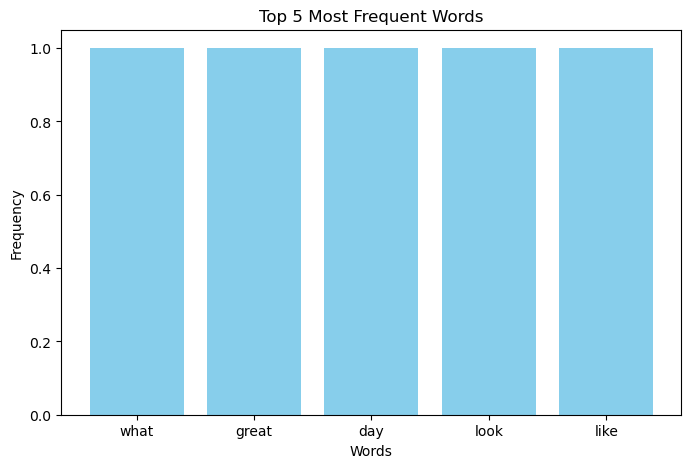

In [15]:
import matplotlib.pyplot as plt

# Select a row to visualize (change index as needed)
index_to_plot = 0  # Change this to visualize a different row

# Extract top 5 words and their frequencies
top_words = dict(socialsentimentdata.loc[index_to_plot, 'freq'].most_common(5))

# Plot the word frequencies
plt.figure(figsize=(8, 5))
plt.bar(top_words.keys(), top_words.values(), color='skyblue')

# Add labels and title
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 5 Most Frequent Words")

# Show the plot
plt.show()

<Axes: xlabel='Samples', ylabel='Counts'>

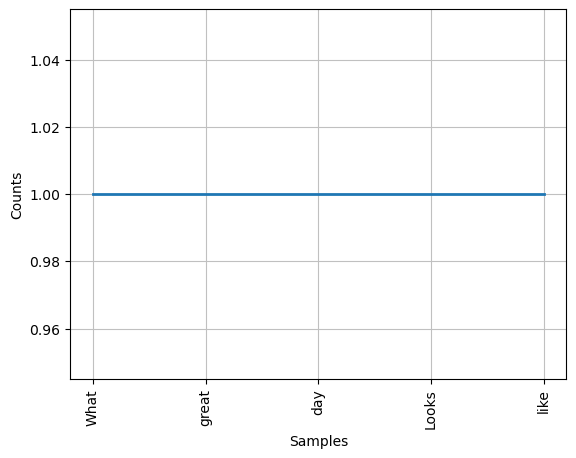

In [19]:
# Select a row to visualize (change index as needed)
index_to_plot = 0  # Change this to visualize a different row

# Plot the top 5 words from the frequency distribution
socialsentimentdata.loc[index_to_plot, 'freql'].plot(5)

In [21]:
#initialize Vadar
sia = SentimentIntensityAnalyzer()

In [24]:
#perform NLP on Headline using .apply() to calculate the compound score for each headline

socialsentimentdata['sentimentscores'] = socialsentimentdata['text'].apply(lambda x: sia.polarity_scores(x)["compound"])

display(socialsentimentdata.head())


,Year,Month,Day,Time of Tweet,text,sentiment,Platform,word_tokenize,filtered_words,stemmed_words,lem_words,freq,freql,top_5_stemmed,top_5_lemmatized,sentimentscores
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter,"[What, a, great, day, !, !, !, Looks, like, dr...","[What, great, day, Looks, like, dream]","[what, great, day, look, like, dream]","[What, great, day, Looks, like, dream]","{'what': 1, 'great': 1, 'day': 1, 'look': 1, '...","{'What': 1, 'great': 1, 'day': 1, 'Looks': 1, ...","[(what, 1), (great, 1), (day, 1), (look, 1), (...","[(What, 1), (great, 1), (day, 1), (Looks, 1), ...",0.8582
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook,"[I, feel, sorry, ,, I, miss, you, here, in, th...","[I, feel, sorry, I, miss, sea, beach]","[i, feel, sorri, i, miss, sea, beach]","[I, feel, sorry, I, miss, sea, beach]","{'i': 2, 'feel': 1, 'sorri': 1, 'miss': 1, 'se...","{'I': 2, 'feel': 1, 'sorry': 1, 'miss': 1, 'se...","[(i, 2), (feel, 1), (sorri, 1), (miss, 1), (se...","[(I, 2), (feel, 1), (sorry, 1), (miss, 1), (se...",-0.2263
2,2017,8,18,night,Don't angry me,negative,Facebook,"[Do, n't, angry, me]","[Do, angry]","[do, angri]","[Do, angry]","{'do': 1, 'angri': 1}","{'Do': 1, 'angry': 1}","[(do, 1), (angri, 1)]","[(Do, 1), (angry, 1)]",0.4023
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook,"[We, attend, in, the, class, just, for, listen...","[We, attend, class, listening, teachers, readi...","[we, attend, class, listen, teacher, read, sli...","[We, attend, class, listening, teacher, readin...","{'we': 1, 'attend': 1, 'class': 1, 'listen': 1...","{'We': 1, 'attend': 1, 'class': 1, 'listening'...","[(we, 1), (attend, 1), (class, 1), (listen, 1)...","[(We, 1), (attend, 1), (class, 1), (listening,...",0.0000
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram,"[Those, who, want, to, go, ,, let, them, go]","[Those, want, go, let, go]","[those, want, go, let, go]","[Those, want, go, let, go]","{'those': 1, 'want': 1, 'go': 2, 'let': 1}","{'Those': 1, 'want': 1, 'go': 2, 'let': 1}","[(go, 2), (those, 1), (want, 1), (let, 1)]","[(go, 2), (Those, 1), (want, 1), (let, 1)]",0.0772


In [26]:
#Create a "Sentiment' column which categorizes the scores as positive if (>0.7), neutral (-0.7 to 0.7),
#negative (<-0.7)

socialsentimentdata['stm'] = np.where(socialsentimentdata['sentimentscores'] > 0.7, 'positive', 
                           np.where(socialsentimentdata['sentimentscores'] < -0.7,'negative','neutral'))
#check results
neutral = socialsentimentdata.query("sentimentscores <= 0.7 and sentimentscores >= -0.7")
positive = socialsentimentdata.query('sentimentscores > 0.7')
negative = socialsentimentdata.query('sentimentscores < -0.7')

display(positive[['text','sentimentscores','stm']].head())
display(neutral[['text','sentimentscores','stm']].tail())
display(negative[['text','sentimentscores','stm']].tail())

,text,sentimentscores,stm
0,What a great day!!! Looks like dream.,0.8582,positive
6,2 am feedings for the baby are fun when he is ...,0.7506,positive
10,Love is something like E=MC^2 rules,0.7717,positive
31,"I buy Sophie's world book, I'm really so happy",0.7260,positive
33,That`s very funny. Cute kids.,0.7559,positive


,text,sentimentscores,stm
494,"According to , a quarter of families under six...",-0.5106,neutral
495,the plan to not spend money is not going well,-0.2057,neutral
496,uploading all my bamboozle pictures of facebook,-0.3612,neutral
497,congratulations ! you guys finish a month ear...,0.6360,neutral
498,"actually, I wish I was back in Tahoe. I miss...",0.2732,neutral


,text,sentimentscores,stm
321,ohh my tooth is hurts ohh im sad it very hurts,-0.8519,negative
338,Argh noo! Missed The Killers on Wossy! That s...,-0.9400,negative
396,Laying ALONE!! Since Mook`s soo comfy in his f...,-0.7111,negative
439,Ok ... the passengers ... no one is alive ... ...,-0.7003,negative
456,NOW IM SAD BUT IM NOT GIVING IN FIRST..I DIDNT...,-0.7877,negative


In [30]:
bbc=pd.read_csv('bbc-text-1.csv')

display(bbc.head())

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [46]:
#wordstemming
bbcwordanalysis =bbc[['text']].copy()

display(bbcwordanalysis)

,text
0,tv future in the hands of viewers with home th...
1,worldcom boss left books alone former worldc...
2,tigers wary of farrell gamble leicester say ...
3,yeading face newcastle in fa cup premiership s...
4,ocean s twelve raids box office ocean s twelve...
...,...
2220,cars pull down us retail figures us retail sal...
2221,kilroy unveils immigration policy ex-chatshow ...
2222,rem announce new glasgow concert us band rem h...
2223,how political squabbles snowball it s become c...


In [50]:
bbcwordanalysis['tokenize'] = bbcwordanalysis.text.apply(word_tokenize)

display(bbcwordanalysis.head())

,text,tokenize
0,tv future in the hands of viewers with home th...,"[tv, future, in, the, hands, of, viewers, with..."
1,worldcom boss left books alone former worldc...,"[worldcom, boss, left, books, alone, former, w..."
2,tigers wary of farrell gamble leicester say ...,"[tigers, wary, of, farrell, gamble, leicester,..."
3,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, in, fa, cup, premie..."
4,ocean s twelve raids box office ocean s twelve...,"[ocean, s, twelve, raids, box, office, ocean, ..."


In [56]:
# filter out stopwords

mystopwords = set(stopwords.words("english"))

# Apply filtering to each row
bbcwordanalysis['filtered'] = bbcwordanalysis['tokenize'].apply(
    lambda words: [word for word in words if word not in mystopwords and word.isalpha()]
)

# Print filtered results
print("Filtered words:")
print(bbcwordanalysis['filtered'].head())


Filtered words:
0    [tv, future, hands, viewers, home, theatre, sy...
1    [worldcom, boss, left, books, alone, former, w...
2    [tigers, wary, farrell, gamble, leicester, say...
3    [yeading, face, newcastle, fa, cup, premiershi...
4    [ocean, twelve, raids, box, office, ocean, twe...
Name: filtered, dtype: object


In [60]:
# stemming - eliminating affixes (suffixed, prefixes, infixes, circumfixes) to obtain a word stem

# Initialize Porter Stemmer
ps = PorterStemmer()

# Apply stemming to each word in the list
bbcwordanalysis['stem'] = bbcwordanalysis['filtered'].apply(
    lambda words: [ps.stem(word) for word in words]
)


#apply lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply stemming to each word in the list
bbcwordanalysis['lem'] = bbcwordanalysis['filtered'].apply(
    lambda words: [lemmatizer.lemmatize(word) for word in words]
)



# Print results
display(bbcwordanalysis[['filtered', 'stem','lem']].head())

,filtered,stem,lem
0,"[tv, future, hands, viewers, home, theatre, sy...","[tv, futur, hand, viewer, home, theatr, system...","[tv, future, hand, viewer, home, theatre, syst..."
1,"[worldcom, boss, left, books, alone, former, w...","[worldcom, boss, left, book, alon, former, wor...","[worldcom, bos, left, book, alone, former, wor..."
2,"[tigers, wary, farrell, gamble, leicester, say...","[tiger, wari, farrel, gambl, leicest, say, rus...","[tiger, wary, farrell, gamble, leicester, say,..."
3,"[yeading, face, newcastle, fa, cup, premiershi...","[yead, face, newcastl, fa, cup, premiership, s...","[yeading, face, newcastle, fa, cup, premiershi..."
4,"[ocean, twelve, raids, box, office, ocean, twe...","[ocean, twelv, raid, box, offic, ocean, twelv,...","[ocean, twelve, raid, box, office, ocean, twel..."


In [62]:
# Calculating frequency of words
# Apply frequency distribution correctly
bbcwordanalysis['freq'] = bbcwordanalysis['stem'].apply(lambda words: FreqDist(words))
bbcwordanalysis['freql'] = bbcwordanalysis['lem'].apply(lambda words: FreqDist(words))

# Print frequency distributions
display(bbcwordanalysis[['freq', 'freql']].head())


,freq,freql
0,"{'tv': 14, 'futur': 2, 'hand': 2, 'viewer': 4,...","{'tv': 14, 'future': 2, 'hand': 2, 'viewer': 4..."
1,"{'worldcom': 8, 'boss': 3, 'left': 1, 'book': ...","{'worldcom': 8, 'bos': 3, 'left': 1, 'book': 2..."
2,"{'tiger': 2, 'wari': 1, 'farrel': 5, 'gambl': ...","{'tiger': 2, 'wary': 1, 'farrell': 5, 'gamble'..."
3,"{'yead': 4, 'face': 4, 'newcastl': 3, 'fa': 2,...","{'yeading': 4, 'face': 4, 'newcastle': 3, 'fa'..."
4,"{'ocean': 5, 'twelv': 3, 'raid': 1, 'box': 3, ...","{'ocean': 5, 'twelve': 3, 'raid': 1, 'box': 3,..."


In [64]:
#perform NLP on Headline using .apply() to calculate the compound score for each headline

bbcwordanalysis['stmscores'] = bbcwordanalysis['text'].apply(lambda x: sia.polarity_scores(x)["compound"])

display(bbcwordanalysis[['text','stmscores']].head())

,text,stmscores
0,tv future in the hands of viewers with home th...,0.9934
1,worldcom boss left books alone former worldc...,-0.9728
2,tigers wary of farrell gamble leicester say ...,0.9403
3,yeading face newcastle in fa cup premiership s...,0.9607
4,ocean s twelve raids box office ocean s twelve...,0.9218


In [66]:
#Create a "Sentiment' column which categorizes the scores as positive if (>0.7), neutral (-0.7 to 0.7),
#negative (<-0.7)

bbcwordanalysis['stm'] = np.where(bbcwordanalysis['stmscores'] > 0.7, 'positive', 
                           np.where(bbcwordanalysis['stmscores'] < -0.7,'negative','neutral'))
#check results
neutral = bbcwordanalysis.query("stmscores <= 0.7 and stmscores >= -0.7")
positive = bbcwordanalysis.query('stmscores > 0.7')
negative = bbcwordanalysis.query('stmscores < -0.7')

display(positive[['text','stmscores','stm']].head())
display(neutral[['text','stmscores','stm']].tail())
display(negative[['text','stmscores','stm']].tail())

,text,stmscores,stm
0,tv future in the hands of viewers with home th...,0.9934,positive
2,tigers wary of farrell gamble leicester say ...,0.9403,positive
3,yeading face newcastle in fa cup premiership s...,0.9607,positive
4,ocean s twelve raids box office ocean s twelve...,0.9218,positive
5,howard hits back at mongrel jibe michael howar...,0.9913,positive


,text,stmscores,stm
2190,newry to fight cup exit in courts newry city a...,0.6157,neutral
2201,ban on forced retirement under 65 employers wi...,-0.5574,neutral
2208,snicket tops us box office chart the film adap...,-0.4019,neutral
2210,teens know little of politics teenagers ques...,0.5522,neutral
2218,davies favours gloucester future wales hooker ...,0.3860,neutral


,text,stmscores,stm
2204,argonaut founder rebuilds empire jez san the ...,-0.9792,negative
2215,junk e-mails on relentless rise spam traffic i...,-0.9440,negative
2217,rings of steel combat net attacks gambling is ...,-0.9984,negative
2219,beijingers fume over parking fees choking traf...,-0.9513,negative
2223,how political squabbles snowball it s become c...,-0.9851,negative
